# Geobit Descriptor
Running a matching example

## Environment configuration
Installing dependencies and compiling the C++ implementation

In [1]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 150})'''))
!  apt -q update && apt -q install -y libpcl-dev libsuitesparse-dev #assumes colab already contains OpenCV 

<IPython.core.display.Javascript object>

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
G

In [2]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 150})'''))

! unzip GeobitNonrigidDescriptor_ICCV_2019-master.zip
%cd GeobitNonrigidDescriptor_ICCV_2019-master/
! mkdir build
%cd build
! cmake -DNO_CONTRIB=ON ..
! make -j

<IPython.core.display.Javascript object>

Archive:  GeobitNonrigidDescriptor_ICCV_2019-master.zip
af6b1c298584b5e5deb6782c43b4f1bfcb16d37e
   creating: GeobitNonrigidDescriptor_ICCV_2019-master/
  inflating: GeobitNonrigidDescriptor_ICCV_2019-master/.gitignore  
  inflating: GeobitNonrigidDescriptor_ICCV_2019-master/CMakeLists.txt  
  inflating: GeobitNonrigidDescriptor_ICCV_2019-master/INSTALL_SINGULARITY.md  
  inflating: GeobitNonrigidDescriptor_ICCV_2019-master/LICENSE  
  inflating: GeobitNonrigidDescriptor_ICCV_2019-master/README.md  
   creating: GeobitNonrigidDescriptor_ICCV_2019-master/example/
  inflating: GeobitNonrigidDescriptor_ICCV_2019-master/example/cloud_1-depth.png  
  inflating: GeobitNonrigidDescriptor_ICCV_2019-master/example/cloud_1-rgb.png  
  inflating: GeobitNonrigidDescriptor_ICCV_2019-master/example/cloud_1.csv  
  inflating: GeobitNonrigidDescriptor_ICCV_2019-master/example/intrinsics.xml  
   creating: GeobitNonrigidDescriptor_ICCV_2019-master/images/
  inflating: GeobitNonrigidDescriptor_ICCV_2019

## Running the compiled code through the command line

In [13]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 150})'''))
import os.path as osp

if not osp.exists("SimulationICCV.tar.gz"):
  ! wget "https://www.verlab.dcc.ufmg.br/hyperlapse/downloads/nonrigid/SimulationICCV.tar.gz" #Download the Simulated dataset
  ! tar -xf SimulationICCV.tar.gz

bin_dir = "/content/GeobitNonrigidDescriptor_ICCV_2019-master/build"
input_path = "./SimulationICCV/kanagawa_scale"
%cd $bin_dir

#Call C++ executable with desired flags
! rm $input_path/*.h5 #This line forces removing old .h5 files, for some reason files are being created as root in Colab and it can cause problems when running this cell multiple times
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_master -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_1 -datasettype simulation -pyramidlevels 1

<IPython.core.display.Javascript object>

/content/GeobitNonrigidDescriptor_ICCV_2019-master/build
rm: cannot remove './SimulationICCV/kanagawa_scale/*.h5': No such file or directory
keypoint scale: 7
Pyramid Levels: 1
Not defined a detector. Using Star detector.
Not defined distance threshold. Using 15.
isocurve size: 0.06
Loading cloud from ./SimulationICCV/kanagawa_scale/cloud_master
[240.0000030116032, 0, 320.0000088465843;
 0, 239.9999728955751, 239.9999900240659;
 0, 0, 1]
Loaded cloud: 320 x 240
#Loaded keypoints [refcloud]: 100
Extracting descriptors from 100 keypoints.
Creating mesh... done
Computing heatflow from scratch... it may take a while
#Face: 149411
Finding unconnected vertices
#Unconnected vertices: 762
Computing shifts
Updating indices of connected vertices and loading faces
Removing unconnected vertices and loading them
hmTriDistanceBuild...
distance.time: 0.0505802
Loaded 1024 pair tests from the file.
Calculating descriptors with rotation = 0.00 (1 of 12)
Calculating descriptors with rotation = 30.00 (2 

## Loading saved descriptors in Python and plotting the matches
The C++ code generates a .h5 file containing the descriptors and keypoint IDs for each image (in the same folder), which can easily be imported in Python for further processing. The files have the same name as the images and ends with '.h5'. 

In [14]:
import h5py

desc_f1 = h5py.File(input_path + '/cloud_master.h5', 'r')
desc_f2 = h5py.File(input_path + '/cloud_1.h5', 'r')


We can use OpenCV's native matcher with Hamming distance to match the descriptors using only the first orientation bin:

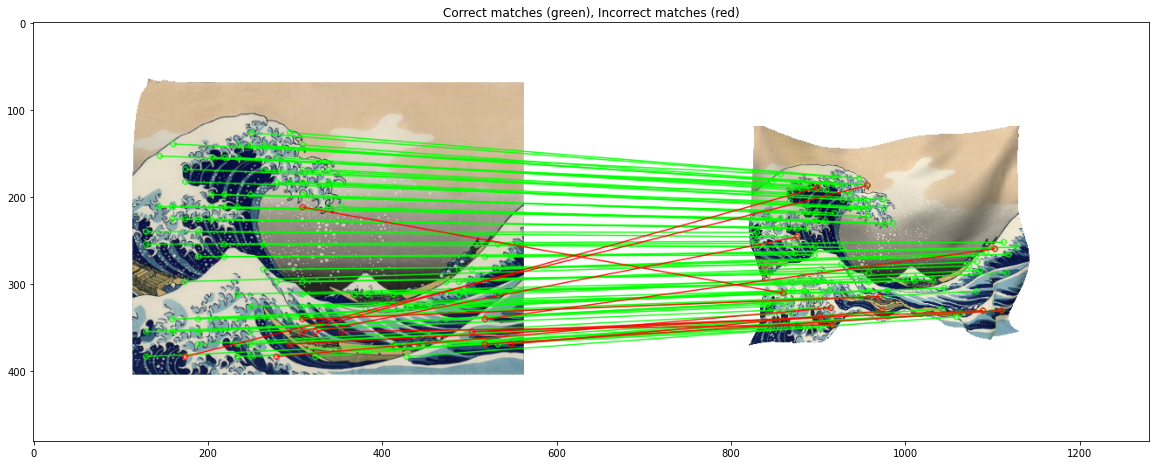

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread(input_path + '/cloud_master-rgb.png')      
img2 = cv.imread(input_path + '/cloud_1-rgb.png') 

csv1 = np.recfromcsv(input_path + '/cloud_master.csv' , delimiter =',', filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')
csv2 = np.recfromcsv(input_path + '/cloud_1.csv' , delimiter =',', filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')

#Generate OpenCV keypoints from CSV file
kp1 = [cv.KeyPoint(csv1[i]['x'], csv1[i]['y'], 7.0) for i in range(len(csv1)) if csv1[i]['valid'] == 1]
kp2 = [cv.KeyPoint(csv2[i]['x'], csv2[i]['y'], 7.0) for i in range(len(csv2)) if csv2[i]['valid'] == 1]

#Grab descriptors considering only the first orientation bin (this assumes the images have no in-plane rotation changes)
#in case you want to match all orientations, you have to match the source descriptor with all orientations of the target descriptor and find argmin
des1 = desc_f1['descriptors'][...,0]
des2 = desc_f2['descriptors'][...,0]

#We can also access the keypoint IDs (useful for ground-truth validation)
ids1 = desc_f1['id'][...]
ids2 = desc_f2['id'][...]

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=False)
# Match descriptors.
matches = bf.match(des1,des2)

#Use IDs ground-truth to plot correct and incorrect matches
right, wrong = [], []
for i in range(len(matches)):
  if ids1[matches[i].queryIdx] == ids2[matches[i].trainIdx]:
    right.append(matches[i])
  else:
    wrong.append(matches[i])

plt.figure(figsize=(20,100))
img_match = cv.drawMatches(img1, kp1, img2, kp2, right, None, (0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_match = cv.drawMatches(img1, kp1, img2, kp2, wrong, img_match, (0,0,255), flags=cv.DrawMatchesFlags_DRAW_OVER_OUTIMG | cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_match[...,::-1])
plt.title('Correct matches (green), Incorrect matches (red)')
plt.show()